In [252]:
import os
import sys
sys.path.append(os.path.abspath('../../..')) 
from plotting_utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

%matplotlib inline
set_matplotlib_style()



In [253]:
RL_START_STEP = 200000

In [254]:
data_path = '../../discrete-mbrl-model-free_data.csv'
df = pd.read_csv(data_path)
df = df[df['step'] > RL_START_STEP]
df



,step,y_pos,x_pos,carry_key,door_unlocked,beta,run_id
200020,200001,4,2,True,False,0.01,ymfjx0p9
200021,200002,4,2,True,False,0.01,ymfjx0p9
200022,200003,4,3,True,False,0.01,ymfjx0p9
200023,200004,4,3,True,False,0.01,ymfjx0p9
200024,200005,4,3,True,False,0.01,ymfjx0p9
...,...,...,...,...,...,...,...
23541832,500219,4,6,True,True,0.00,fw8g4lgn
23541833,500220,4,6,True,True,0.00,fw8g4lgn
23541834,500221,5,6,True,True,0.00,fw8g4lgn
23541835,500222,6,6,True,True,0.00,fw8g4lgn


beta = 0.0

In [255]:
def get_groups(df):
    df_nkey_ndoor = df.loc[df["door_unlocked"] == False]
    df_nkey_ndoor = df_nkey_ndoor.loc[df_nkey_ndoor["carry_key"] == False]
    df_nkey_ndoor
    

    df_key_ndoor = df.loc[df["door_unlocked"] == False]
    df_key_ndoor = df_key_ndoor.loc[df_key_ndoor["carry_key"] == True]
    df_key_ndoor

    df_key_door = df.loc[df["door_unlocked"] == True]
    df_key_door = df_key_door.loc[df_key_door["carry_key"] == True]
    df_key_door 

    grouped = [df_nkey_ndoor, df_key_ndoor, df_key_door]

    return grouped


1466305
1868814
1769182


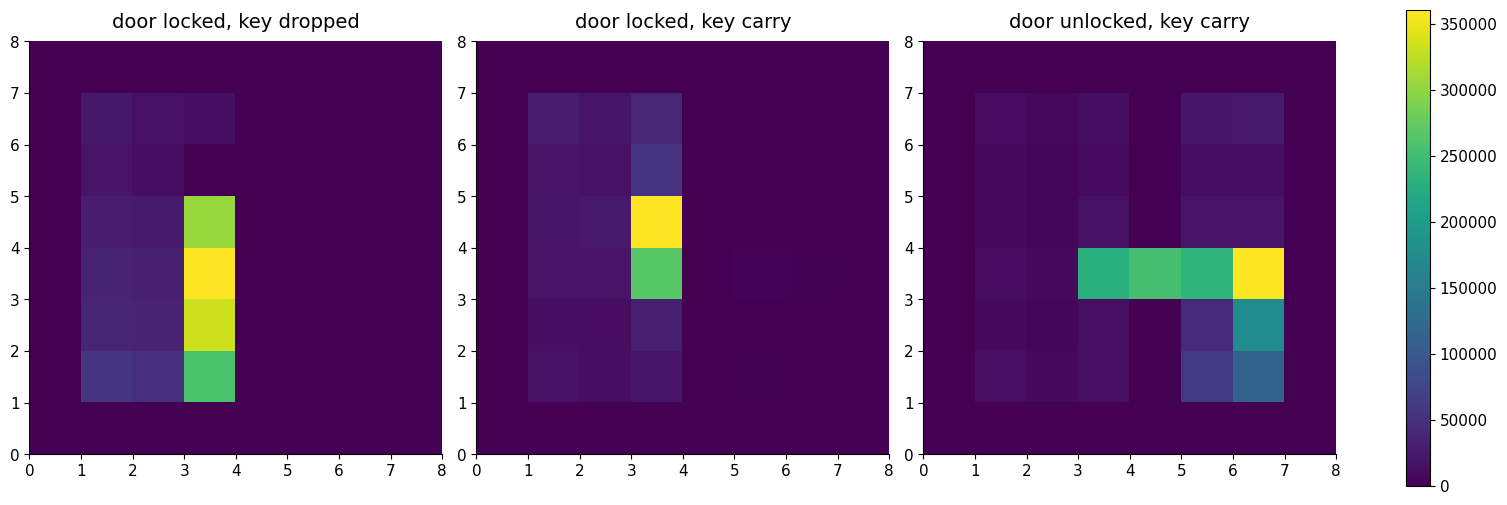

In [256]:
determ_env_df = df[df['beta'] == 0.001]
grouped = get_groups(determ_env_df)

x = df['x_pos']
y = df['y_pos']
heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
heatmap = heatmap.T
max_count = np.max(heatmap)


i = 0
n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

for group in grouped:
    print(len(group))
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    h = axes[i].imshow(heatmap.T, interpolation='nearest', origin='lower',
        extent=[0, 8, 0, 8])
    
    axes[i].set_title(titles[i])    

    i += 1
    if i >= n_groups:
        break



    # the actual x-axis and y-axis are from 0 to 19
    # we want to put 11 ticks on the axis
    # ax.set_xticks(np.linspace(0,7, 8))
    # ax.set_yticks(np.linspace(0,7, 8))

fig.colorbar(h, ax=axes)

plt.show()


# Show the plot

# First phase

Plot visitation count for first 50K steps of learning

## PPO with count (beta == 0.001)

In [273]:
determ_env_df = df[df['step'] < 250000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.001]
determ_env_df

,step,y_pos,x_pos,carry_key,door_unlocked,beta,run_id
9705207,200001,3,2,True,False,0.001,7kr5jtht
9705208,200002,3,2,True,False,0.001,7kr5jtht
9705209,200003,3,2,True,False,0.001,7kr5jtht
9705210,200004,3,2,True,False,0.001,7kr5jtht
9705211,200005,3,2,True,False,0.001,7kr5jtht
...,...,...,...,...,...,...,...
17759574,249995,3,3,True,True,0.001,3ii8rgfl
17759575,249996,4,3,True,True,0.001,3ii8rgfl
17759576,249997,5,3,True,True,0.001,3ii8rgfl
17759577,249998,6,3,True,True,0.001,3ii8rgfl


264457
393849
191762


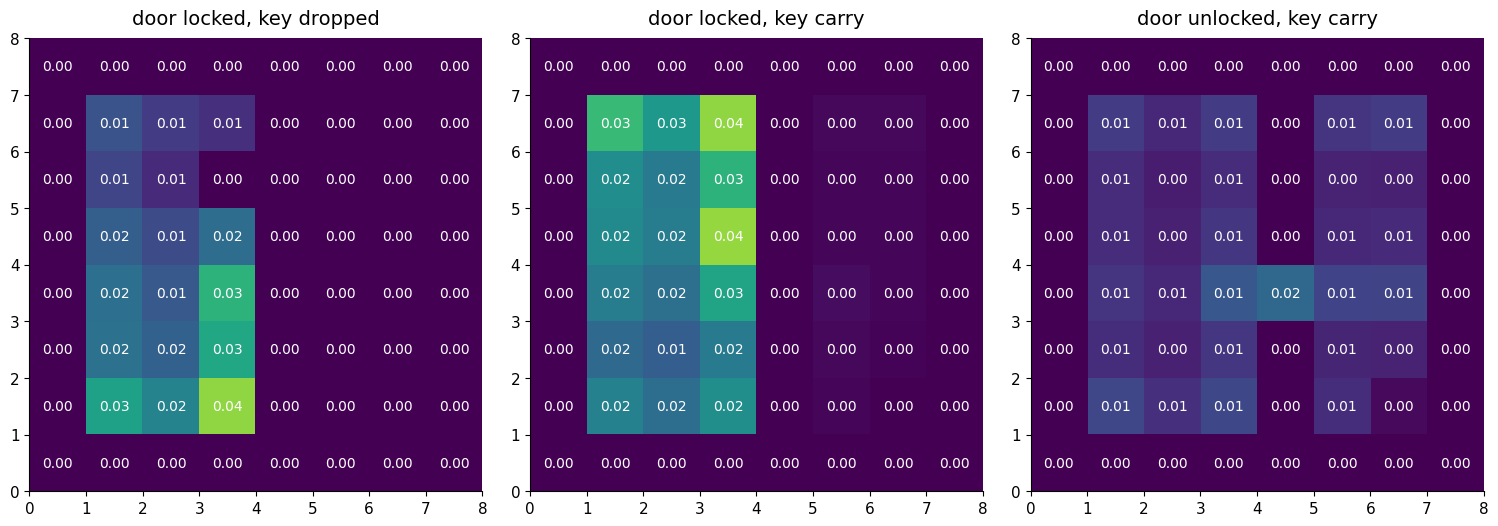

In [274]:
grouped = get_groups(determ_env_df)

x = df['x_pos']
y = df['y_pos']
heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
heatmap = heatmap.T
max_count = np.max(heatmap)


i = 0
n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# Calculate the sum for probability
sum = 0
for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    sum += np.sum(heatmap)


for group in grouped:
    print(len(group))
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])

    probabilities = heatmap / sum


    h = axes[i].imshow(
        probabilities.T,  # Transpose to match heatmap orientation
        interpolation='nearest',
        origin='lower',
        extent=[0, 8, 0, 8],
        cmap='viridis',
        vmin=0,
        vmax=0.05
    )

    for row in range(probabilities.shape[0]):
        for col in range(probabilities.shape[1]):
            axes[i].text(
                col + 0.5, row + 0.5,  # Position in the center of the cell
                f"{probabilities[col, row]:.2f}",  # Format probability
                ha='center', va='center', color='white'
            )
    
    axes[i].set_title(titles[i])    

    i += 1
    if i >= n_groups:
        break



    # the actual x-axis and y-axis are from 0 to 19
    # we want to put 11 ticks on the axis
    # ax.set_xticks(np.linspace(0,7, 8))
    # ax.set_yticks(np.linspace(0,7, 8))

# fig.colorbar(h, ax=axes)

plt.show()

## PPO

In [275]:
determ_env_df = df[df['step'] < 250000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.0]
determ_env_df

,step,y_pos,x_pos,carry_key,door_unlocked,beta,run_id
18209848,200001,5,1,False,False,0.0,56vgb4nu
18209849,200002,5,1,False,False,0.0,56vgb4nu
18209850,200003,5,1,False,False,0.0,56vgb4nu
18209851,200004,5,1,False,False,0.0,56vgb4nu
18209852,200005,5,1,False,False,0.0,56vgb4nu
...,...,...,...,...,...,...,...
23291583,249995,3,3,False,False,0.0,fw8g4lgn
23291584,249996,3,3,False,False,0.0,fw8g4lgn
23291585,249997,3,3,False,False,0.0,fw8g4lgn
23291586,249998,3,3,False,False,0.0,fw8g4lgn


164294
270109
115641


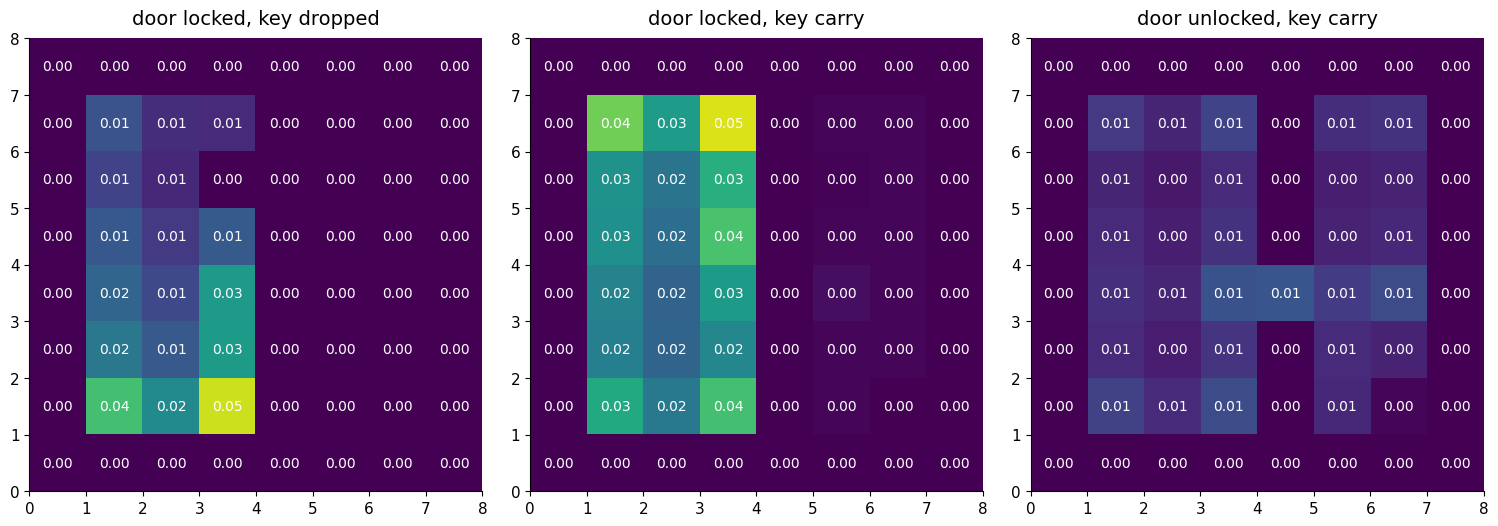

In [276]:
grouped = get_groups(determ_env_df)

x = df['x_pos']
y = df['y_pos']
heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
heatmap = heatmap.T
max_count = np.max(heatmap)


i = 0
n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# Calculate the sum for probability
sum = 0
for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    sum += np.sum(heatmap)


for group in grouped:
    print(len(group))
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])

    probabilities = heatmap / sum


    h = axes[i].imshow(
        probabilities.T,  # Transpose to match heatmap orientation
        interpolation='nearest',
        origin='lower',
        extent=[0, 8, 0, 8],
        cmap='viridis',
        vmin=0,
        vmax=0.05
    )

    for row in range(probabilities.shape[0]):
        for col in range(probabilities.shape[1]):
            axes[i].text(
                col + 0.5, row + 0.5,  # Position in the center of the cell
                f"{probabilities[col, row]:.2f}",  # Format probability
                ha='center', va='center', color='white'
            )
    
    axes[i].set_title(titles[i])    

    i += 1
    if i >= n_groups:
        break



    # the actual x-axis and y-axis are from 0 to 19
    # we want to put 11 ticks on the axis
    # ax.set_xticks(np.linspace(0,7, 8))
    # ax.set_yticks(np.linspace(0,7, 8))

# fig.colorbar(h, ax=axes)

plt.show()

# Second Phase

The first 100K steps of learning

## PPO with count (beta == 0.001)

In [ ]:
determ_env_df = df[df['step'] < 300000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.001]
determ_env_df

,step,y_pos,x_pos,carry_key,door_unlocked,beta,run_id
9696,200144,4.0,3.0,False,False,0.001,effortless-sunset-45
9697,200757,1.0,1.0,True,False,0.001,effortless-sunset-45
9698,201878,3.0,3.0,True,False,0.001,effortless-sunset-45
9699,203228,2.0,3.0,True,False,0.001,effortless-sunset-45
9700,203474,6.0,3.0,True,False,0.001,effortless-sunset-45
...,...,...,...,...,...,...,...
17802,295389,6.0,1.0,False,False,0.001,effortless-oath-61
17803,295575,4.0,3.0,True,True,0.001,effortless-oath-61
17804,297390,3.0,3.0,True,False,0.001,effortless-oath-61
17805,297721,4.0,3.0,False,False,0.001,effortless-oath-61


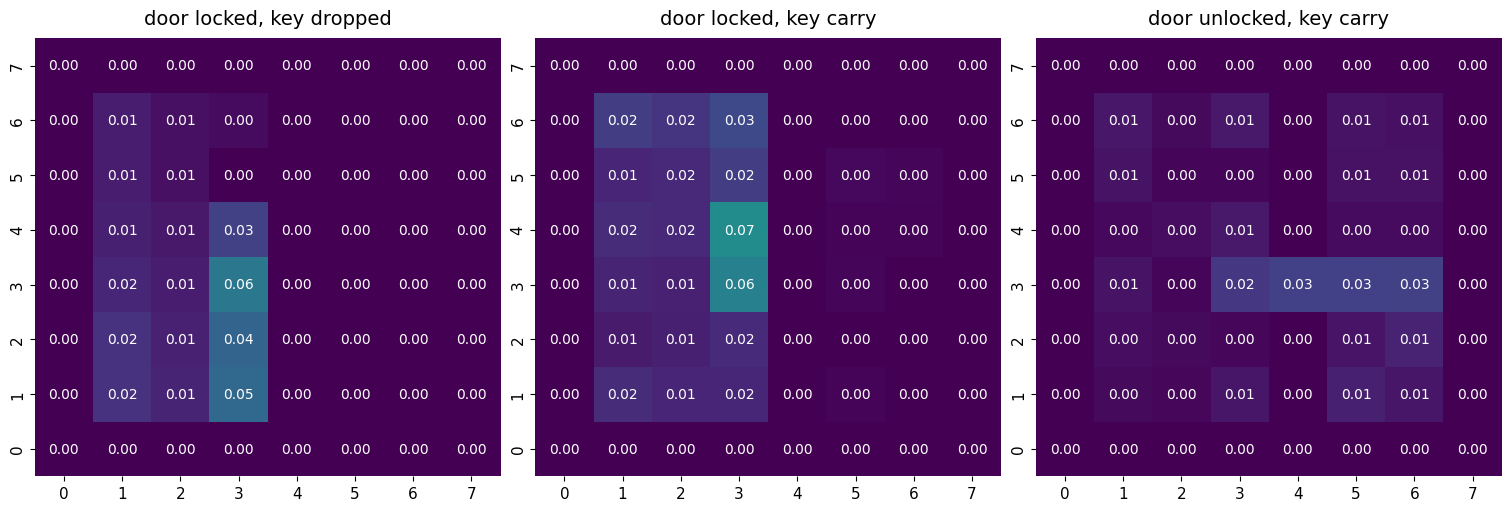

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables

grouped = get_groups(determ_env_df)

n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# To collect heatmap data for normalization
all_heatmaps = []

for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()

    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    all_heatmaps.append(heatmap)

# Normalize the color range across all heatmaps
vmin = min(h.min() for h in all_heatmaps)
vmax = max(h.max() for h in all_heatmaps)

sum = 0
for i, heatmap in enumerate(all_heatmaps):
    sum += heatmap.sum()

# Plot each heatmap using Seaborn
for i, heatmap in enumerate(all_heatmaps):
    probabilities = heatmap / sum

    sns.heatmap(
        probabilities.T,
        annot=True,  # Add numbers to tiles
        fmt=".2f",   # Format numbers to 2 decimal places
        cmap="viridis",
        cbar=None,
        cbar_ax=None,  # Shared colorbar
        ax=axes[i],
        vmin=0,
        vmax=0.14
    )
    axes[i].set_title(titles[i])
    axes[i].invert_yaxis()  # Invert y-axis to match matrix structure (optional)

plt.show()


## PPO

In [ ]:
determ_env_df = df[df['step'] < 300000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.0]
determ_env_df

,step,y_pos,x_pos,carry_key,door_unlocked,beta,run_id
18199,201011,4.0,4.0,True,True,0.0,proud-vortex-62
18200,201323,3.0,5.0,True,True,0.0,proud-vortex-62
18201,202325,2.0,3.0,True,False,0.0,proud-vortex-62
18202,204799,3.0,3.0,True,False,0.0,proud-vortex-62
18203,205150,4.0,6.0,True,True,0.0,proud-vortex-62
...,...,...,...,...,...,...,...
20793,294713,5.0,3.0,False,False,0.0,avid-surf-67
20794,295044,5.0,3.0,False,False,0.0,avid-surf-67
20795,295642,4.0,3.0,True,False,0.0,avid-surf-67
20796,298459,5.0,6.0,True,True,0.0,avid-surf-67


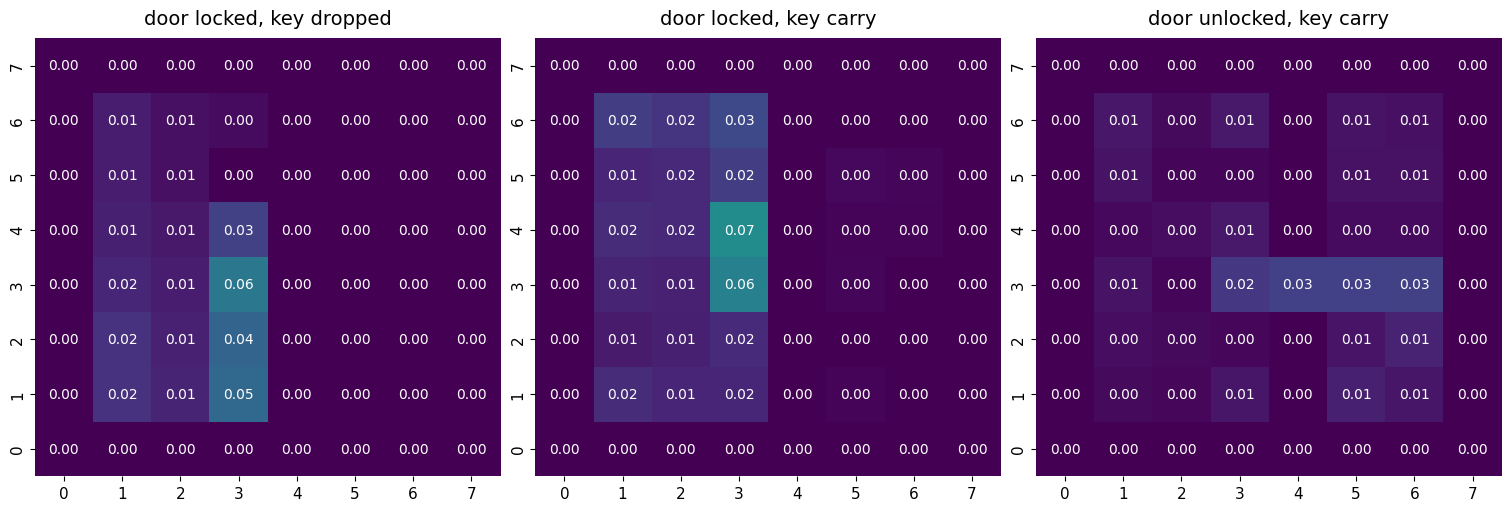

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables
n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# To collect heatmap data for normalization
all_heatmaps = []

for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()

    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    all_heatmaps.append(heatmap)

# Normalize the color range across all heatmaps
vmin = min(h.min() for h in all_heatmaps)
vmax = max(h.max() for h in all_heatmaps)

sum = 0
for i, heatmap in enumerate(all_heatmaps):
    sum += heatmap.sum()
    
# Plot each heatmap using Seaborn
for i, heatmap in enumerate(all_heatmaps):
    probabilities = heatmap / sum

    sns.heatmap(
        probabilities.T,
        annot=True,  # Add numbers to tiles
        fmt=".2f",   # Format numbers to 2 decimal places
        cmap="viridis",
        cbar=None,
        cbar_ax=None,  # Shared colorbar
        ax=axes[i],
        vmin=0,
        vmax=0.14
    )
    axes[i].set_title(titles[i])
    axes[i].invert_yaxis()  # Invert y-axis to match matrix structure (optional)

plt.show()


# Third Phase

The first 200K steps of learning

## PPO with count (beta == 0.001)

In [ ]:
determ_env_df = df[df['step'] < 400000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.001]
determ_env_df

,step,y_pos,x_pos,carry_key,door_unlocked,beta,run_id
9696,200144,4.0,3.0,False,False,0.001,effortless-sunset-45
9697,200757,1.0,1.0,True,False,0.001,effortless-sunset-45
9698,201878,3.0,3.0,True,False,0.001,effortless-sunset-45
9699,203228,2.0,3.0,True,False,0.001,effortless-sunset-45
9700,203474,6.0,3.0,True,False,0.001,effortless-sunset-45
...,...,...,...,...,...,...,...
17902,395821,4.0,3.0,True,False,0.001,effortless-oath-61
17903,396302,4.0,4.0,True,True,0.001,effortless-oath-61
17904,396435,3.0,3.0,True,False,0.001,effortless-oath-61
17905,396885,4.0,5.0,True,True,0.001,effortless-oath-61


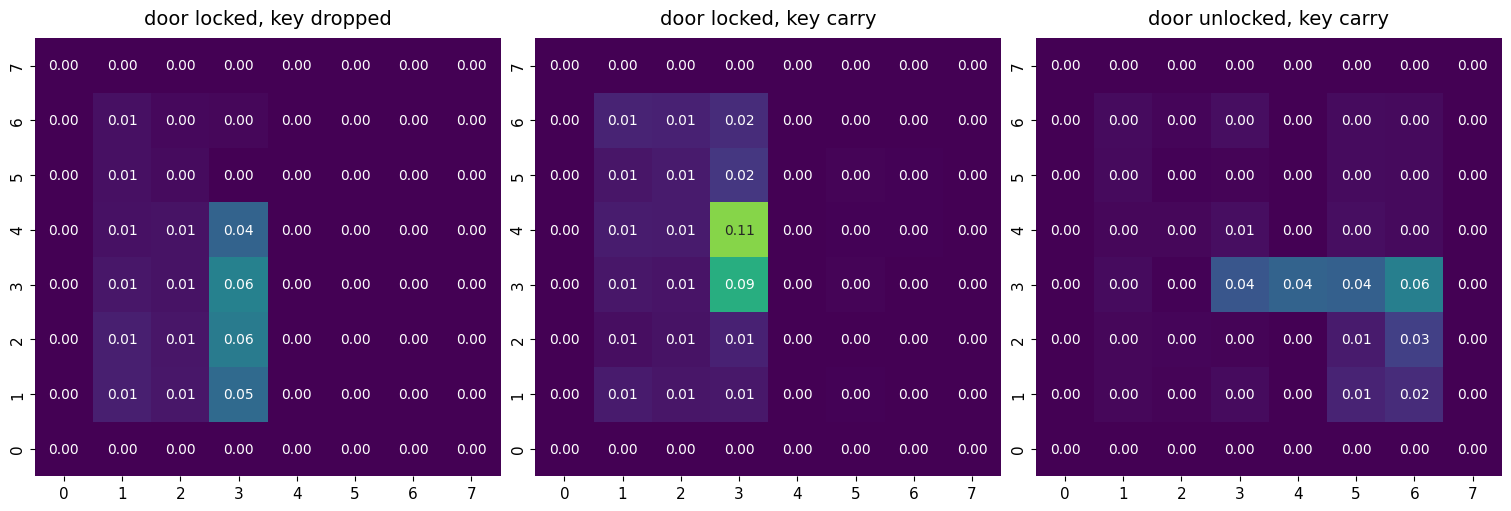

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables
grouped = get_groups(determ_env_df)


n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# To collect heatmap data for normalization
all_heatmaps = []

for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()

    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    all_heatmaps.append(heatmap)

# Normalize the color range across all heatmaps
vmin = min(h.min() for h in all_heatmaps)
vmax = max(h.max() for h in all_heatmaps)

sum = 0
for i, heatmap in enumerate(all_heatmaps):
    sum += heatmap.sum()

# Plot each heatmap using Seaborn
for i, heatmap in enumerate(all_heatmaps):
    probabilities = heatmap / sum

    sns.heatmap(
        probabilities.T,
        annot=True,  # Add numbers to tiles
        fmt=".2f",   # Format numbers to 2 decimal places
        cmap="viridis",
        cbar=None,
        cbar_ax=None,  # Shared colorbar
        ax=axes[i],
        vmin=0,
        vmax=0.14
    )
    axes[i].set_title(titles[i])
    axes[i].invert_yaxis()  # Invert y-axis to match matrix structure (optional)

plt.show()


## PPO

In [ ]:
determ_env_df = df[df['step'] < 400000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.0]
determ_env_df

,step,y_pos,x_pos,carry_key,door_unlocked,beta,run_id
18199,201011,4.0,4.0,True,True,0.0,proud-vortex-62
18200,201323,3.0,5.0,True,True,0.0,proud-vortex-62
18201,202325,2.0,3.0,True,False,0.0,proud-vortex-62
18202,204799,3.0,3.0,True,False,0.0,proud-vortex-62
18203,205150,4.0,6.0,True,True,0.0,proud-vortex-62
...,...,...,...,...,...,...,...
20898,390783,5.0,6.0,True,True,0.0,avid-surf-67
20899,393255,4.0,3.0,True,False,0.0,avid-surf-67
20900,394315,3.0,3.0,True,False,0.0,avid-surf-67
20901,394858,3.0,3.0,False,False,0.0,avid-surf-67


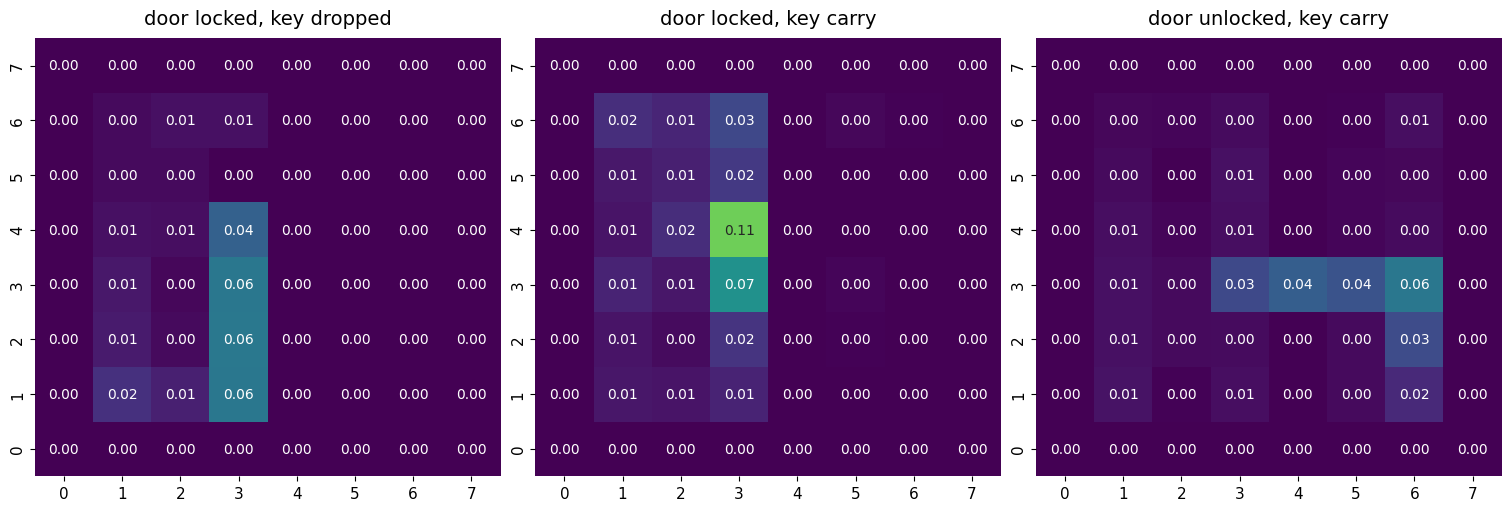

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables
grouped = get_groups(determ_env_df)

n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# To collect heatmap data for normalization
all_heatmaps = []

for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()

    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    all_heatmaps.append(heatmap)

# Normalize the color range across all heatmaps
vmin = min(h.min() for h in all_heatmaps)
vmax = max(h.max() for h in all_heatmaps)

sum = 0
for i, heatmap in enumerate(all_heatmaps):
    sum += heatmap.sum()

# Plot each heatmap using Seaborn
for i, heatmap in enumerate(all_heatmaps):
    probabilities = heatmap / sum

    sns.heatmap(
        probabilities.T,
        annot=True,  # Add numbers to tiles
        fmt=".2f",   # Format numbers to 2 decimal places
        cmap="viridis",
        cbar=None,
        cbar_ax=None,  # Shared colorbar
        ax=axes[i],
        vmin=0,
        vmax=0.14
    )
    axes[i].set_title(titles[i])
    axes[i].invert_yaxis()  # Invert y-axis to match matrix structure (optional)

plt.show()
